In [111]:
import sqlite3

# Creating a TABLE in Python

connection = sqlite3.connect('sales_data.db')
cursor = connection.cursor()

# SQL command should be in triple quotes 

sql_command = '''CREATE TABLE sales (id INTEGER, Product TEXT, Quantity INTEGER, Price REAL)'''

cursor.execute(sql_command)
connection.close()

OperationalError: table sales already exists

In [21]:
# Insert sample data 

data = [('Product A', 10, 100),
        ('Product B', 5, 200),
        ('Product A',7, 100),
        ('Product C', 3, 150),
        ('Product B', 4, 200)]

cursor.executemany('INSERT INTO sales (Product, Quantity, Price) values(?,?,?)', data)

connection.commit()
connection.close()


ProgrammingError: Cannot operate on a closed database.

In [17]:
# Read data from sql in python

connection = sqlite3.connect('sales_data.db')
cursor = connection.cursor()

# Fetching the data using sql query

cursor.execute('''SELECT * FROM sales;''')

# Fetch all the data using result variable

result = cursor.fetchall()

for i in result:
    print(i)

connection.commit()
connection.close()


(None, 'Product A', 10, 100.0)
(None, 'Product B', 5, 200.0)
(None, 'Product A', 7, 100.0)
(None, 'Product C', 3, 150.0)
(None, 'Product B', 4, 200.0)


In [27]:
print(data)

[('Product A', 10, 100), ('Product B', 5, 200), ('Product A', 7, 100), ('Product C', 3, 150), ('Product B', 4, 200)]


In [33]:
# Total price

connection = sqlite3.connect('sales_data.db')
cursor = connection.cursor()

cursor.execute(''' SELECT sum(Price) as Total_price from sales;''')

Total_price = cursor.fetchall()

print('Total Price:', Total_price)

connection.commit()
connection.close()

Total Price: [(750.0,)]


In [37]:
# Total quantity

connection = sqlite3.connect('sales_data.db')
cursor = connection.cursor()

cursor.execute(''' select Product, sum(Quantity) as Total_quantity from sales group by Product;''')
Total = cursor.fetchall()

for i in Total:
    print(i)

# close the connection
connection.commit()
connection.close()

('Product A', 17)
('Product B', 9)
('Product C', 3)


In [47]:
import matplotlib.pyplot as plt
import pandas as pd

AttributeError: 'list' object has no attribute 'barplot'

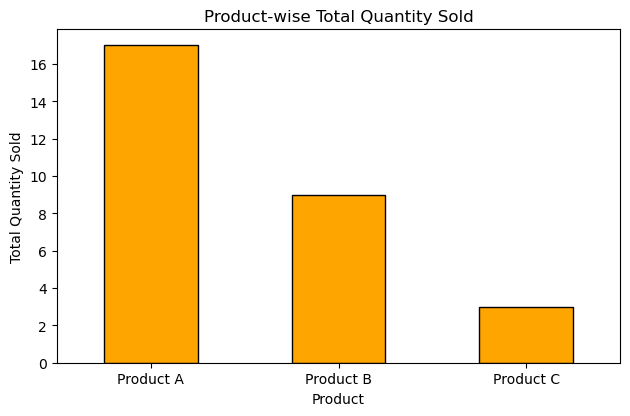

In [103]:
# Connect to the database
connection = sqlite3.connect('sales_data.db')

# Query to get product-wise total quantity
query = ('''
SELECT Product, SUM(Quantity) AS total_quantity
FROM sales
GROUP BY Product
''')

# Read query into DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

# Plotting the bar chart
df.plot(kind='bar', x='Product', y='total_quantity', legend=False, color='orange', edgecolor = 'black')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Product-wise Total Quantity Sold')
plt.tight_layout()
plt.xticks(rotation=0)

plt.show()

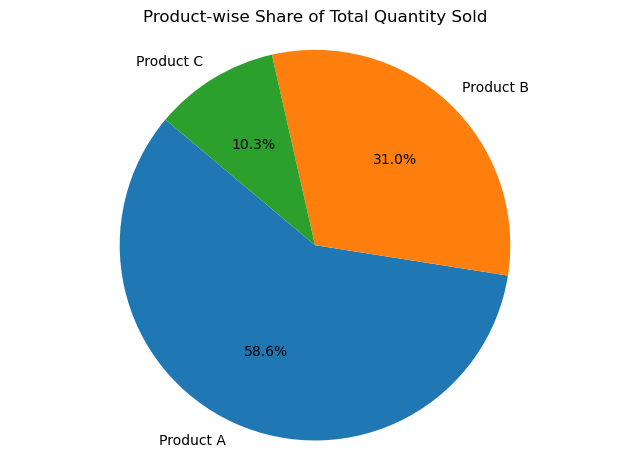

In [65]:
# Connect to the database
connection = sqlite3.connect('sales_data.db')

# Query to get total quantity per product
query = ('''
SELECT Product, SUM(Quantity) AS total_quantity FROM sales GROUP BY Product''')

# Read into DataFrame
df = pd.read_sql_query(query, connection)

# Close connection
connection.close()

# Plotting a pie chart
plt.pie(df['total_quantity'], labels=df['Product'], autopct='%1.1f%%', startangle=140 )
plt.title('Product-wise Share of Total Quantity Sold')
plt.axis('equal')  # Equal aspect ratio makes the pie circular
plt.tight_layout()
plt.show()

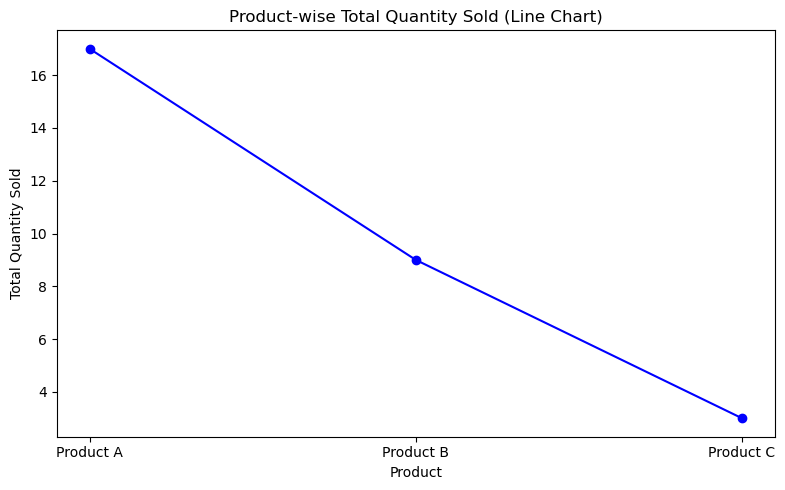

In [69]:
# Connect to the database
connection = sqlite3.connect('sales_data.db')

# SQL query: total quantity by product
query = '''
SELECT Product, SUM(Quantity) AS total_quantity
FROM sales
GROUP BY Product
'''

# Load into DataFrame
df = pd.read_sql_query(query, connection)
connection.close()

# Line chart
plt.figure(figsize=(8, 5))
plt.plot(df['Product'], df['total_quantity'], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Product-wise Total Quantity Sold (Line Chart)')
plt.tight_layout()

# Show the chart
plt.show()